In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import os

In [2]:
os.listdir('Dataset')

['0', '1', '2', '3']

In [3]:
train = os.path.join(os.path.dirname('Dataset'), "4.Operations Department/train")

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [5]:
# Batch_size = Derin öğrenme uygulamalarında, veri setinde bulunan tüm verileri aynı anda işleyerek öğrenme, zaman ve bellek açısından maliyetli bir iştir.
# Bu problemi çözmek için; veri seti küçük gruplara ayrılmakta ve öğrenme işlemi seçilen bu küçük gruplar üzerinde yapılmaktadır. 
train_generator = image_generator.flow_from_directory(batch_size=40, directory = 'Dataset', shuffle= True, target_size =(256,256), class_mode='categorical',subset='training')

Found 428 images belonging to 4 classes.


In [6]:
val_generator = image_generator.flow_from_directory(batch_size=40, directory = 'Dataset', shuffle= True, target_size =(256,256), class_mode='categorical',subset='validation')

Found 104 images belonging to 4 classes.


In [7]:
train_images, train_labels = next(train_generator)
train_images.shape

(40, 256, 256, 3)

In [8]:
train_labels.shape

(40, 4)

In [9]:
label_names = {0:'COvid-19',1:'Normal',2:'Viral Pneumonia',3:'Bacterial Pnemonia'}

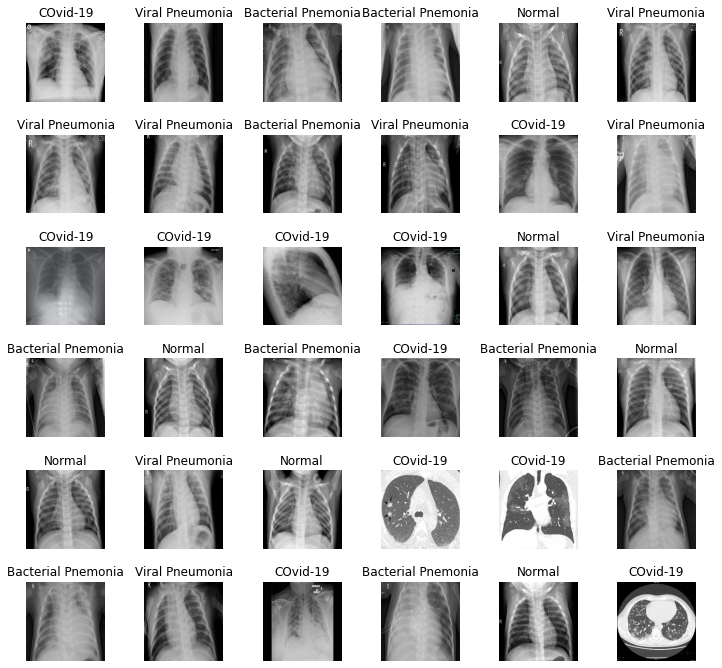

In [10]:
L=6
W=6
fig,axes = plt.subplots(L,W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(train_images[i])
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)

In [11]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input
basemodel = ResNet50(weights='imagenet',include_top=False, input_tensor=Input(shape= (256,256,3)))

In [12]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [13]:
from tensorflow.keras import layers
for layer in basemodel.layers[:-10]:
    layers.trainable=False

In [14]:
from tensorflow.keras.layers import Dense, Flatten,  AveragePooling2D, Dropout
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size=(4,4))(headmodel)
headmodel = Flatten(name='flatten')(headmodel)
headmodel= Dense(256,activation='relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel= Dense(256,activation='relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel= Dense(4,activation='softmax')(headmodel)

In [15]:
from tensorflow.keras.models import Model
model = Model(inputs= basemodel.input, outputs= headmodel)

In [16]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(learning_rate=0.0001),metrics=['accuracy'])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
earlystopping = EarlyStopping(monitor= 'val_loss', mode='min', patience=20)
checkpointer = ModelCheckpoint(filepath='weights.hdf5',verbose=1,save_best_only=True)

In [18]:
train_generator= image_generator.flow_from_directory(batch_size=4,directory='Dataset',shuffle=True,target_size=(256,256),class_mode='categorical',subset='training')
val_generator= image_generator.flow_from_directory(batch_size=4,directory='Dataset',shuffle=True,target_size=(256,256),class_mode='categorical',subset='validation')

Found 428 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


In [19]:
history = model.fit_generator(train_generator,epochs=25,validation_data=val_generator,callbacks=[checkpointer,earlystopping])

Epoch 1/25


C:\Users\dnz1p\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


107/107 [==============================] - 184s 2s/step - loss: 0.9347 - accuracy: 0.6636 - val_loss: 3.6656 - val_accuracy: 0.2500

Epoch 00001: val_loss improved from inf to 3.66556, saving model to weights.hdf5


C:\Users\dnz1p\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/25
107/107 [==============================] - 171s 2s/step - loss: 0.4807 - accuracy: 0.8575 - val_loss: 8.5574 - val_accuracy: 0.2500

Epoch 00002: val_loss did not improve from 3.66556
Epoch 3/25
107/107 [==============================] - 166s 2s/step - loss: 0.3230 - accuracy: 0.9112 - val_loss: 34.5273 - val_accuracy: 0.2500

Epoch 00003: val_loss did not improve from 3.66556
Epoch 4/25
107/107 [==============================] - 165s 2s/step - loss: 0.1984 - accuracy: 0.9369 - val_loss: 37.7156 - val_accuracy: 0.2500

Epoch 00004: val_loss did not improve from 3.66556
Epoch 5/25
107/107 [==============================] - 167s 2s/step - loss: 0.1692 - accuracy: 0.9416 - val_loss: 9.0998 - val_accuracy: 0.2500

Epoch 00005: val_loss did not improve from 3.66556
Epoch 6/25
107/107 [==============================] - 170s 2s/step - loss: 0.0961 - accuracy: 0.9790 - val_loss: 4.9543 - val_accuracy: 0.2788

Epoch 00006: val_loss did not improve from 3.66556
Epoch 7/25
107/107 [===

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'Training accuracy and Loss')

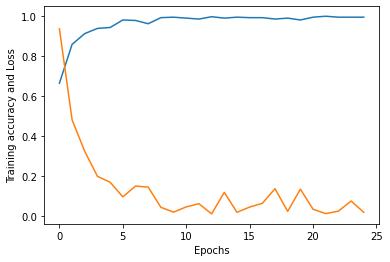

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training accuracy and Loss')

In [22]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_directory(batch_size=40,directory='Test', shuffle=True, target_size=(256,256),class_mode='categorical')

Found 40 images belonging to 4 classes.


In [24]:
evaluate= model.evaluate(test_generator,steps=test_generator.n//4, verbose=1)
print('accuracy test: {}'.format(evaluate[1]))

10/10 [==============================] - 3s 1ms/step - loss: 4.6968 - accuracy: 0.7250
accuracy test: 0.7250000238418579
